### Importing Necessary libraries and reading the dataset

In [50]:
#Author :Gokul VU :)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the dataset into python environment

In [51]:
data= pd.read_csv("titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.Make ‘PassengerId’ as the index column

In [52]:
data.set_index("PassengerId", inplace = True)
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [54]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 4. Fill in all the missing values present in all the columns in the dataset

In [56]:
data['Cabin'] = data['Cabin'].fillna('Unknown')

In [57]:
avg=data['Age'].mean() # The mean  age is chosen to fill the null values
data["Age"]=data["Age"].fillna(avg)

In [58]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].value_counts().index[0])

In [59]:
data.isnull().sum() # checking for null values again

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset

In [60]:
# For Fare Column
df1=data
print('skewness of Fare: ',df1['Fare'].skew()) 

skewness of Fare:  4.787316519674893


The skewness value of Fare column is 4.78 .This shows that the variable is rightly skewed, indicating the presence of outliers.

In [61]:
q1=df1['Fare'].quantile(0.25)
q2=df1['Fare'].quantile(0.75)
iq=q2-q1
iq

23.0896

In [62]:
whis_width = 1.5
f_outliers = df1[(df1['Fare'] < q1 - whis_width*iq) | (df1['Fare'] > q2 + whis_width*iq)]
f_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,Unknown,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C


In [63]:
f_mean = df1['Fare'].mean()
f_std = df1['Fare'].std()
lowest= f_mean -(3 * f_std)
highest= f_mean + (3 * f_std)
f_outliers = df1[(df1['Fare'] < lowest) | (df1['Fare'] > highest)]
f_outliers.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,Unknown,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [64]:
low_whis= q1 -(whis_width*iq)
upper_whis = q2 + (whis_width*iq)
df1['Fare']=np.where(df1['Fare']>upper_whis,upper_whis,np.where(df1['Fare']<low_whis,low_whis,df1['Fare']))

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

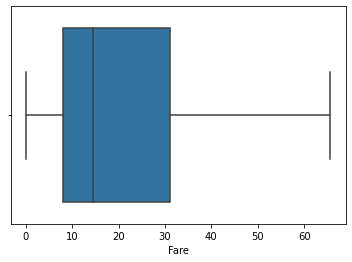

In [65]:
sns.boxplot(df1['Fare'],data=df1)

In [66]:
# for age column
print('skewness of Age: ',df1['Age'].skew()) 

skewness of Age:  0.4344880940129925


In [67]:
q3=df1['Age'].quantile(0.25)
q4=df1['Age'].quantile(0.75)
iq2=q4-q3
iq2

13.0

In [68]:
a_outliers = df1[(df1['Age'] < q3 - whis_width*iq2) | (df1['Age'] > q4 + whis_width*iq2)]
a_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,Unknown,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.550,C103,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,Unknown,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,Unknown,Q
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.500,Unknown,S


In [69]:
a_mean = df1['Age'].mean()
a_std = df1['Age'].std()
lowest= a_mean -(3 * a_std)
highest= a_mean + (3 * a_std)
a_outliers = df1[(df1['Age'] < lowest) | (df1['Age'] > highest)]
a_outliers.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Unknown,Q
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,Unknown,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,Unknown,S


In [70]:
low_whis= q3 -(whis_width*iq2)
upper_whis = q4 + (whis_width*iq2)
df1['Age']=np.where(df1['Age']>upper_whis,upper_whis,np.where(df1['Age']<low_whis,low_whis,df1['Age']))

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

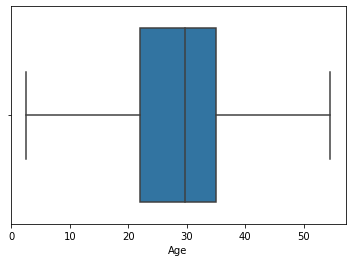

In [71]:
sns.boxplot(df1['Age'],data=df1)

In [72]:
# for Sibsp column
print('skewness of SibSp: ',df1['SibSp'].skew()) 

skewness of SibSp:  3.6953517271630565


In [73]:
q5=df1['SibSp'].quantile(0.25)
q6=df1['SibSp'].quantile(0.75)
iq3=q6-q5
iq3

1.0

In [74]:
s_outliers = df1[(df1['SibSp'] < q5 - whis_width*iq3) | (df1['SibSp'] > q6 + whis_width*iq3)]
s_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.5,3,1,349909,21.0750,Unknown,S
17,0,3,"Rice, Master. Eugene",male,2.5,4,1,382652,29.1250,Unknown,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,Unknown,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,65.6344,C23 C25 C27,S
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,Unknown,S


In [75]:
s_mean = df1['SibSp'].mean()
s_std = df1['SibSp'].std()
lowest=s_mean -(3 * s_std)
highest= s_mean + (3 * s_std)
s_outliers = df1[(df1['SibSp'] < lowest) | (df1['SibSp'] > highest)]
s_outliers.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
17,0,3,"Rice, Master. Eugene",male,2.5,4,1,382652,29.1250,Unknown,Q
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,Unknown,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,Unknown,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,Unknown,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,Unknown,S


In [76]:
low_whis= q5 -(whis_width*iq3)
upper_whis = q6 + (whis_width*iq3)
df1['SibSp']=np.where(df1['SibSp']>upper_whis,upper_whis,np.where(df1['SibSp']<low_whis,low_whis,df1['SibSp']))

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

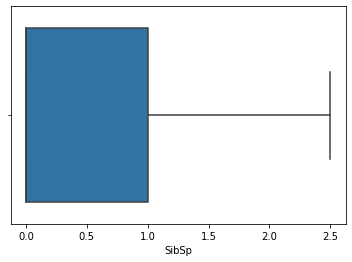

In [77]:
sns.boxplot(df1['SibSp'],data=df1)

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [78]:
## one hot encoding
df1 = pd.get_dummies(df1, columns=['Sex', 'Embarked'])
df1.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1.0,0,A/5 21171,7.2500,Unknown,0,1,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0,PC 17599,65.6344,C85,1,0,1,0,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0.0,0,STON/O2. 3101282,7.9250,Unknown,1,0,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0,113803,53.1000,C123,1,0,0,0,1
5,0,3,"Allen, Mr. William Henry",35.0,0.0,0,373450,8.0500,Unknown,0,1,0,0,1


In [79]:
df1.drop(['Name','SibSp','Ticket','Cabin'],axis=1,inplace=True)

In [82]:
#importing 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # creating object

In [83]:
scaled = scaler.fit_transform(df1)
print(scaled)

[[0.         1.         0.375      ... 0.         0.         1.        ]
 [1.         0.         0.68269231 ... 1.         0.         0.        ]
 [1.         1.         0.45192308 ... 0.         0.         1.        ]
 ...
 [0.         1.         0.52305995 ... 0.         0.         1.        ]
 [1.         0.         0.45192308 ... 1.         0.         0.        ]
 [0.         1.         0.56730769 ... 0.         1.         0.        ]]


In [84]:
data_new = pd.DataFrame(scaled)
data_new.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.375000,0.0,0.110460,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.682692,0.0,1.000000,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.451923,0.0,0.120745,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.625000,0.0,0.809027,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.625000,0.0,0.122649,0.0,1.0,0.0,0.0,1.0
